In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

# Task Data #

The task data is parsed first.

In [2]:
task_df = pd.read_csv('../data/processed/task_data.csv')
task_df

,p_number,ipad_number,t1_type,t1_isSuccess,t1_numWords,t2_type,t2_isSuccess,t2_numWords,t3_type,t3_isSuccess,t3_numWords,t4_type,t4_isSuccess,t4_numWords,t5_type,t5_isSuccess,t5_numWords,t6_type,t6_isSuccess,t6_numWords,t7_type,t7_isSuccess,t7_numWords,t8_type,t8_isSuccess,t8_numWords,t9_type,t9_isSuccess,t9_numWords,t10_type,t10_isSuccess,t10_numWords
0,1,1,3,True,6,2,True,4,2,True,4,3,True,5,3,True,3,3,True,6,3,True,4,3,True,2,3,True,11,2,True,2
1,2,2,3,True,7,3,True,7,3,True,5,3,True,6,3,True,9,3,True,6,3,True,5,3,True,3,3,False,2,3,True,7
2,3,3,2,True,3,2,True,4,2,True,4,3,True,7,2,True,2,2,True,4,3,True,3,3,True,2,2,True,8,3,True,3
3,4,1,3,True,3,3,True,6,3,True,5,3,True,6,3,True,3,1,False,1,1,True,1,2,True,2,0,False,0,3,True,3
4,5,2,3,True,4,2,True,4,2,True,5,3,True,6,3,True,6,3,True,6,1,True,1,3,True,4,3,False,5,2,True,3
5,6,3,2,True,6,3,True,5,2,True,4,2,True,5,2,True,6,2,True,6,2,True,6,3,True,2,3,True,2,2,True,8
6,7,1,2,True,3,2,True,4,3,True,5,3,True,6,3,True,7,3,True,6,3,True,6,3,True,2,3,True,13,2,True,5
7,8,2,2,True,4,2,True,3,2,True,2,2,True,8,3,True,7,2,True,5,2,True,5,3,True,2,2,True,11,2,True,6
8,9,3,3,True,6,3,True,6,3,True,4,2,True,5,3,True,4,3,True,7,3,True,4,3,True,5,3,True,11,3,True,6
9,10,1,2,True,4,2,True,3,2,True,4,2,True,5,2,True,4,3,True,7,2,True,4,3,True,2,2,True,7,3,True,6


## All Data ##

First, information about all the data is calculated.

### Descriptive Analysis ###

This section will show some descriptive stats for all the data.

### Screen Size Breakdown ###

In [3]:
sizes = task_df["ipad_number"].value_counts()
sizes

1    6
3    5
2    4
Name: ipad_number, dtype: int64

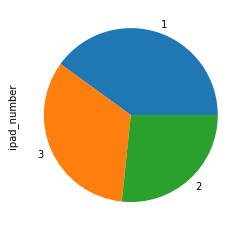

In [4]:
sizes.plot.pie()

 ### Mean Answer Length ###
 
 The mean length of all the task data is calculated.

In [5]:
num_words_df = task_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]]
num_words_df.mean()

t1_numWords     4.666667
t2_numWords     4.666667
t3_numWords     4.666667
t4_numWords     6.333333
t5_numWords     5.800000
t6_numWords     5.533333
t7_numWords     4.266667
t8_numWords     2.933333
t9_numWords     7.733333
t10_numWords    5.133333
dtype: float64

### Number of Failed Tasks ###

The number of unsuccessful attempts for each task is calculated.

In [6]:
task_success_df = task_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]]
for label, contents in task_success_df.items():
    print(contents.value_counts(), "\n\n")

True    15
Name: t1_isSuccess, dtype: int64 


True    15
Name: t2_isSuccess, dtype: int64 


True    15
Name: t3_isSuccess, dtype: int64 


True    15
Name: t4_isSuccess, dtype: int64 


True    15
Name: t5_isSuccess, dtype: int64 


True     14
False     1
Name: t6_isSuccess, dtype: int64 


True    15
Name: t7_isSuccess, dtype: int64 


True    15
Name: t8_isSuccess, dtype: int64 


True     12
False     3
Name: t9_isSuccess, dtype: int64 


True    15
Name: t10_isSuccess, dtype: int64 




## Screen Size ##

The data is now broken up by screen size. This is done to answer the research question about screen size having an impact on the data.

In [7]:
small_df = task_df[task_df["ipad_number"] == 1]
med_df   = task_df[task_df["ipad_number"] == 2]
large_df = task_df[task_df["ipad_number"] == 3]

 ### Mean Answer Length ###
 
 The mean length of each screen size is calculated.

In [8]:
small_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].mean()

t1_numWords     4.000000
t2_numWords     4.333333
t3_numWords     4.333333
t4_numWords     6.333333
t5_numWords     4.833333
t6_numWords     5.000000
t7_numWords     4.000000
t8_numWords     2.833333
t9_numWords     8.333333
t10_numWords    4.333333
dtype: float64

In [9]:
med_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].mean()

t1_numWords     5.25
t2_numWords     5.00
t3_numWords     5.25
t4_numWords     6.75
t5_numWords     7.50
t6_numWords     5.75
t7_numWords     4.50
t8_numWords     2.75
t9_numWords     7.25
t10_numWords    5.50
dtype: float64

In [10]:
large_df[["t1_numWords","t2_numWords","t3_numWords","t4_numWords","t5_numWords","t6_numWords","t7_numWords","t8_numWords","t9_numWords","t10_numWords"]].mean()

t1_numWords     5.0
t2_numWords     4.8
t3_numWords     4.6
t4_numWords     6.0
t5_numWords     5.6
t6_numWords     6.0
t7_numWords     4.4
t8_numWords     3.2
t9_numWords     7.4
t10_numWords    5.8
dtype: float64

### Number of Failed Tasks ###

The number of unsuccessful attempts for each task and each screen size is calculated.

In [11]:
for label, contents in small_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]].items():
    print(contents.value_counts(), "\n\n")

True    6
Name: t1_isSuccess, dtype: int64 


True    6
Name: t2_isSuccess, dtype: int64 


True    6
Name: t3_isSuccess, dtype: int64 


True    6
Name: t4_isSuccess, dtype: int64 


True    6
Name: t5_isSuccess, dtype: int64 


True     5
False    1
Name: t6_isSuccess, dtype: int64 


True    6
Name: t7_isSuccess, dtype: int64 


True    6
Name: t8_isSuccess, dtype: int64 


True     5
False    1
Name: t9_isSuccess, dtype: int64 


True    6
Name: t10_isSuccess, dtype: int64 




In [12]:
for label, contents in med_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]].items():
    print(contents.value_counts(), "\n\n")

True    4
Name: t1_isSuccess, dtype: int64 


True    4
Name: t2_isSuccess, dtype: int64 


True    4
Name: t3_isSuccess, dtype: int64 


True    4
Name: t4_isSuccess, dtype: int64 


True    4
Name: t5_isSuccess, dtype: int64 


True    4
Name: t6_isSuccess, dtype: int64 


True    4
Name: t7_isSuccess, dtype: int64 


True    4
Name: t8_isSuccess, dtype: int64 


True     2
False    2
Name: t9_isSuccess, dtype: int64 


True    4
Name: t10_isSuccess, dtype: int64 




In [13]:
for label, contents in large_df[["t1_isSuccess","t2_isSuccess","t3_isSuccess","t4_isSuccess","t5_isSuccess","t6_isSuccess","t7_isSuccess","t8_isSuccess","t9_isSuccess","t10_isSuccess"]].items():
    print(contents.value_counts(), "\n\n")

True    5
Name: t1_isSuccess, dtype: int64 


True    5
Name: t2_isSuccess, dtype: int64 


True    5
Name: t3_isSuccess, dtype: int64 


True    5
Name: t4_isSuccess, dtype: int64 


True    5
Name: t5_isSuccess, dtype: int64 


True    5
Name: t6_isSuccess, dtype: int64 


True    5
Name: t7_isSuccess, dtype: int64 


True    5
Name: t8_isSuccess, dtype: int64 


True    5
Name: t9_isSuccess, dtype: int64 


True    5
Name: t10_isSuccess, dtype: int64 


